<a href="https://colab.research.google.com/github/Astrocitos/TeamML/blob/main/Arboldedecision_Equipo02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

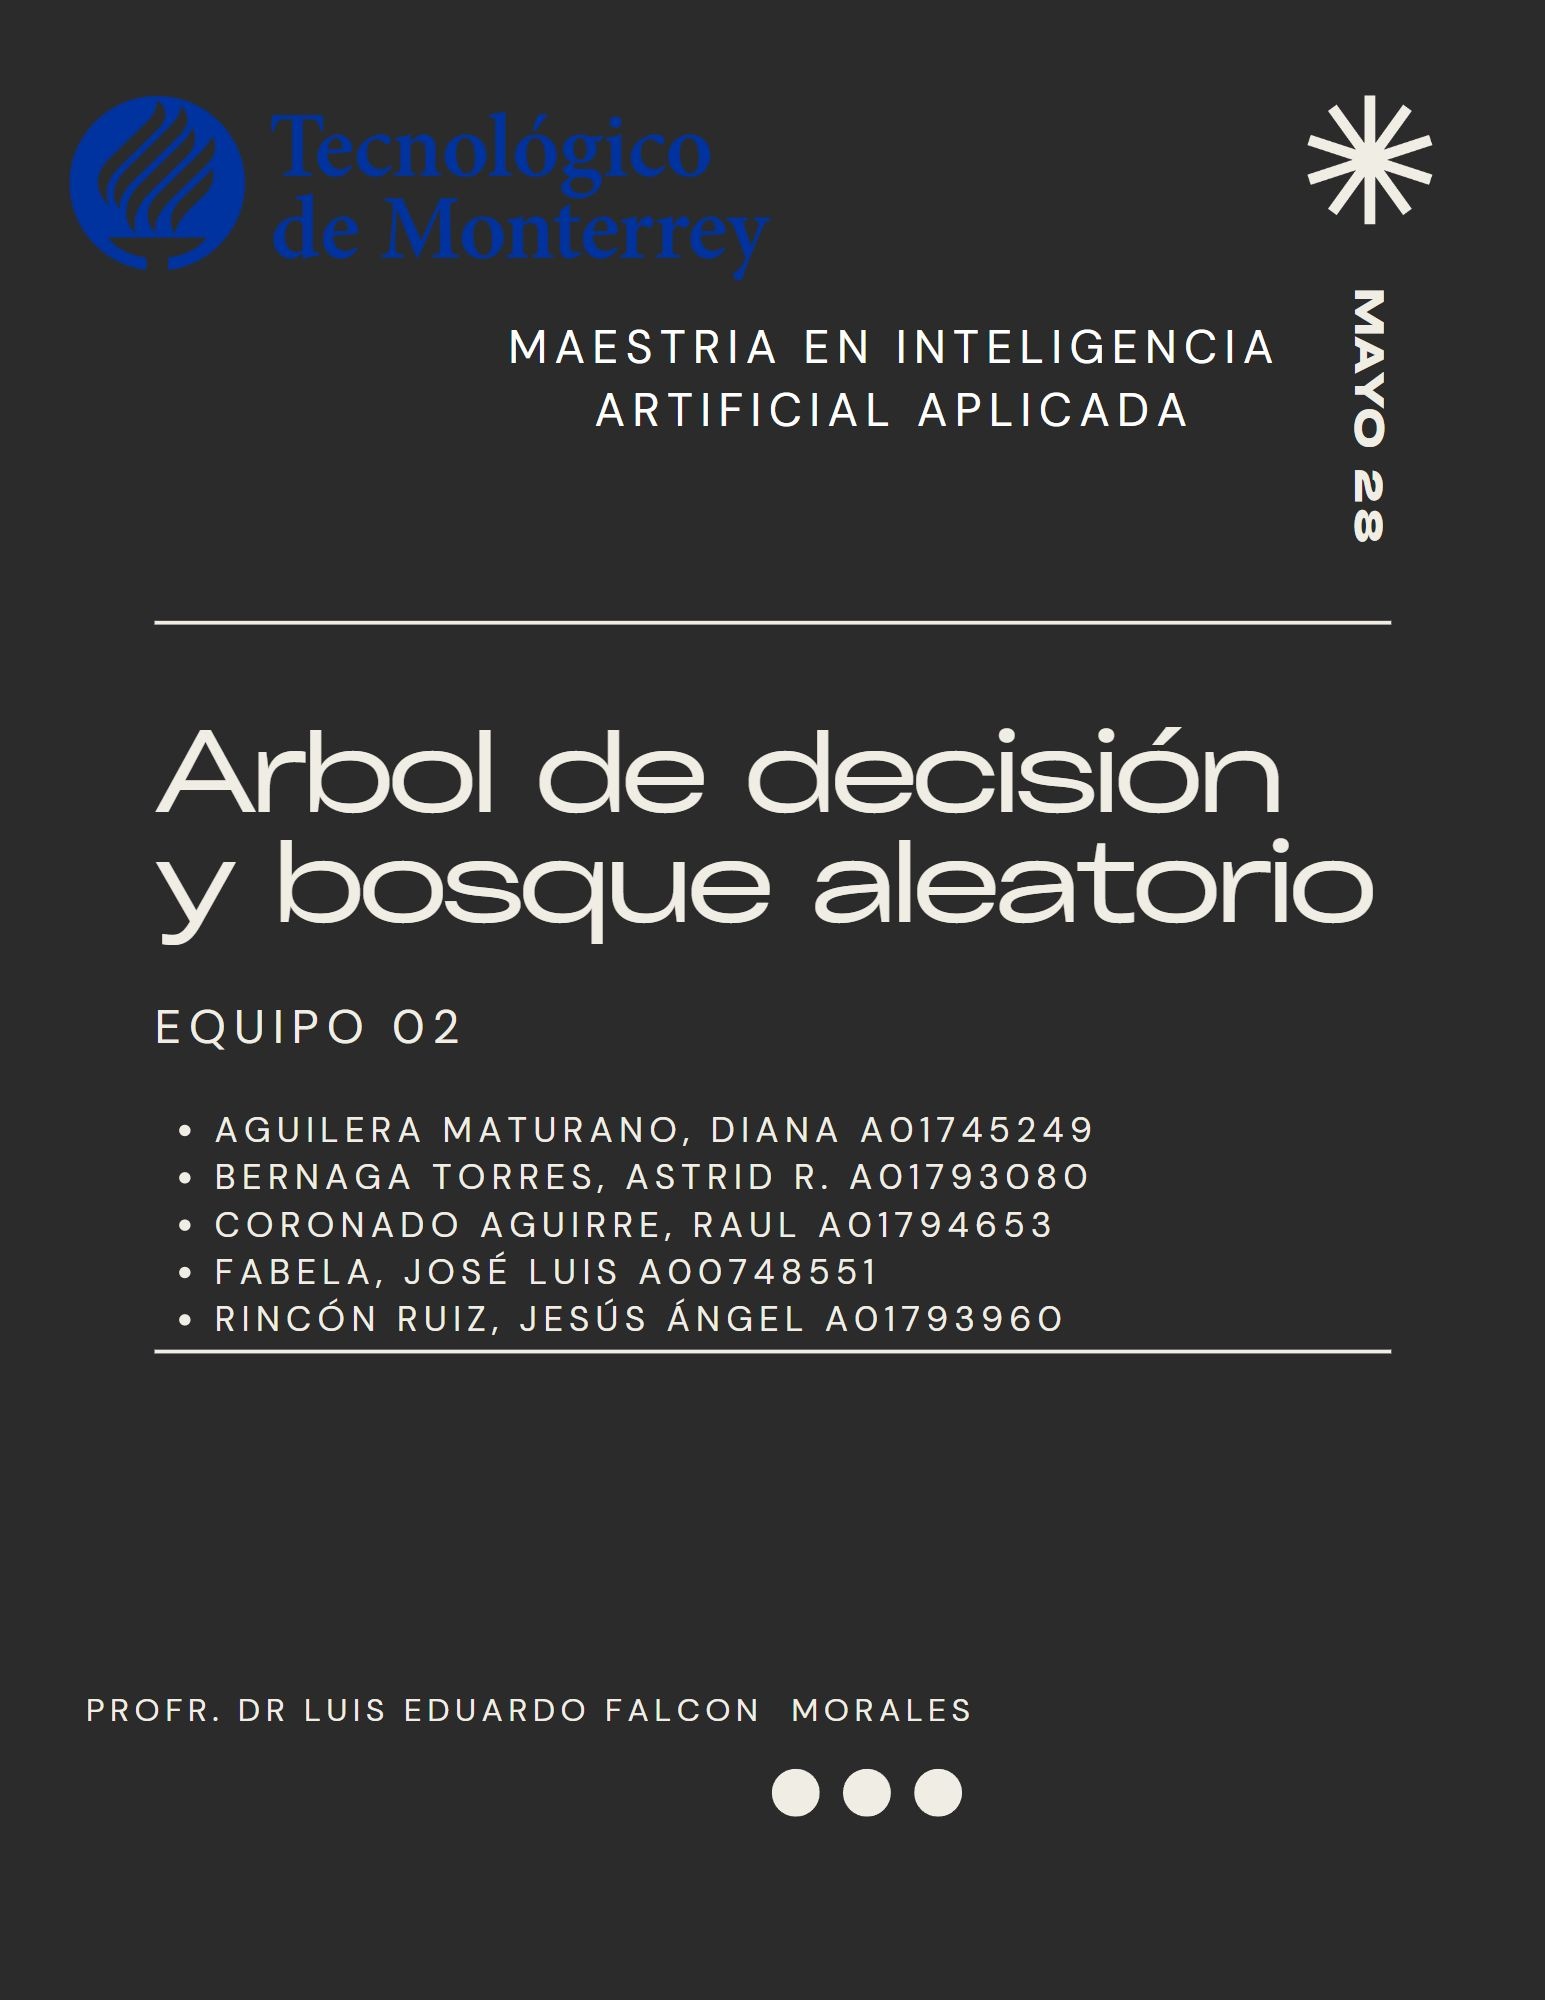


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [ ]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import requests, zipfile
from io import BytesIO

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, PowerTransformer, power_transform
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import cross_validate, RepeatedStratifiedKFold, train_test_split, learning_curve, validation_curve, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, confusion_matrix, classification_report
from sklearn.tree import plot_tree

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Ejercicio-1.**

Carga los datos y sustituye los nombres de las columnas del alemán al inglés de acuerdo a como
se indica en la página de la UCI.

NOTA: Si lo deseas, puedes traducirlos y ponerlas en español.



In [ ]:
# URL del archivo en Google Drive
url = 'https://drive.google.com/file/d/1INUUBGfwo2V575xJ6MYM4J8C-mz76BHi/view?usp=sharing'

# Obtener el ID del archivo
file_id = url.split('/')[-2]

# Construir la URL de descarga directa
download_url = f'https://drive.google.com/uc?id={file_id}'

# Descargar el archivo
req = requests.get(download_url)
zipfile = zipfile.ZipFile(BytesIO(req.content))

# Extraer el archivo del zip
zipfile.extractall()

# Leer el archivo CSV
DataCredit = pd.read_csv("SouthGermanCredit.asc", sep=" ")

# Mostrar el contenido del archivo
print(DataCredit)

     laufkont  laufzeit  moral  verw  hoehe  sparkont  beszeit  rate  famges  \
0           1        18      4     2   1049         1        2     4       2   
1           1         9      4     0   2799         1        3     2       3   
2           2        12      2     9    841         2        4     2       2   
3           1        12      4     0   2122         1        3     3       3   
4           1        12      4     0   2171         1        3     4       3   
..        ...       ...    ...   ...    ...       ...      ...   ...     ...   
995         1        24      2     3   1987         1        3     2       3   
996         1        24      2     0   2303         1        5     4       3   
997         4        21      4     0  12680         5        5     4       3   
998         2        12      2     3   6468         5        1     2       3   
999         1        30      2     2   6350         5        5     4       3   

     buerge  ...  verm  alter  weitkred

In [ ]:
traduccion={
"laufkont" : "status",
"laufzeit" : "duration",
"moral" : "credit_history",
"verw" : "purpose",
"hoehe" : "amount",
"sparkont" : "savings",
"beszeit" : "employment_duration",
"rate" : "installment_rate",
"famges" : "personal_status_sex",
"buerge" : "other_debtors",
"wohnzeit" : "present_residence",
"verm" : "property",
"alter" : "age",
"weitkred" : "other_installment_plans",
"wohn" : "housing",
"bishkred" : "number_credits",
"beruf" : "job",
"pers" : "people_liable",
"telef" : "telephone",
"gastarb" : "foreign_worker",
"kredit" : "credit_risk"
}

#Cambiar el nombre de las columnas
DataCredit.rename(columns = traduccion, inplace = True)

In [ ]:
DataCredit.info() #Datos perdidos al parecer nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   status                   1000 non-null   int64
 1   duration                 1000 non-null   int64
 2   credit_history           1000 non-null   int64
 3   purpose                  1000 non-null   int64
 4   amount                   1000 non-null   int64
 5   savings                  1000 non-null   int64
 6   employment_duration      1000 non-null   int64
 7   installment_rate         1000 non-null   int64
 8   personal_status_sex      1000 non-null   int64
 9   other_debtors            1000 non-null   int64
 10  present_residence        1000 non-null   int64
 11  property                 1000 non-null   int64
 12  age                      1000 non-null   int64
 13  other_installment_plans  1000 non-null   int64
 14  housing                  1000 non-null   int64
 15  numbe

#**Ejercicio-2.**


In [ ]:
# Variables independientes
X = DataCredit.drop("credit_risk", axis = 1)
#Variable dependiente
y = DataCredit["credit_risk"]
print(y.value_counts())

1    700
0    300
Name: credit_risk, dtype: int64


In [ ]:
#Transform categorical to appropriate type
cat_cols = ['status', 'credit_history', 'purpose', 'savings', 'personal_status_sex',
            'other_debtors', 'housing', 'job', 'people_liable',
            'telephone', 'foreign_worker', "other_installment_plans"]
for col in cat_cols:
  DataCredit[col] = DataCredit[col].astype('category')

DataCredit.info() #Revision de nuevos tipos de variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   status                   1000 non-null   category
 1   duration                 1000 non-null   int64   
 2   credit_history           1000 non-null   category
 3   purpose                  1000 non-null   category
 4   amount                   1000 non-null   int64   
 5   savings                  1000 non-null   category
 6   employment_duration      1000 non-null   int64   
 7   installment_rate         1000 non-null   int64   
 8   personal_status_sex      1000 non-null   category
 9   other_debtors            1000 non-null   category
 10  present_residence        1000 non-null   int64   
 11  property                 1000 non-null   int64   
 12  age                      1000 non-null   int64   
 13  other_installment_plans  1000 non-null   category
 14  housing  

**Nota:** si bien la codificacion de estas tres variables (telephone foreign_worker people_liable) debería explicarse en el ejercicio 3, consideramos es necesario aplicarse en todo el set de datos, para evitar que las variables ordinarias se mezclen con las binarias, dado que estas tienen valores de 1 y 2, cuando deberian ser 1 y 0, tal como sucede con el One-Hot,para las variables categóricas.

Se aplica a toda la data, dado que es una acción general y para evitar realizarlo por separado al set de training y testing.

In [ ]:
DataCredit['telephone'] = DataCredit['telephone'].map({1:0, 2:1})
DataCredit['foreign_worker'] = DataCredit['telephone'].map({1:0, 2:1})
DataCredit['people_liable'] = DataCredit['telephone'].map({1:0, 2:1})

In [ ]:
DataCredit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   status                   1000 non-null   category
 1   duration                 1000 non-null   int64   
 2   credit_history           1000 non-null   category
 3   purpose                  1000 non-null   category
 4   amount                   1000 non-null   int64   
 5   savings                  1000 non-null   category
 6   employment_duration      1000 non-null   int64   
 7   installment_rate         1000 non-null   int64   
 8   personal_status_sex      1000 non-null   category
 9   other_debtors            1000 non-null   category
 10  present_residence        1000 non-null   int64   
 11  property                 1000 non-null   int64   
 12  age                      1000 non-null   int64   
 13  other_installment_plans  1000 non-null   category
 14  housing  

In [ ]:
#Division de set de entrenamiento y prueba
X_tv, X_test, ytv, y_test = train_test_split(X, y, test_size = .15, shuffle=True, random_state=1, stratify=y)

#**Ejercicio-3.**



In [ ]:
X_tv.describe()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000
mean,2.584706,20.834118,2.536471,2.730588,3312.940000,2.104706,3.365882,2.955294,2.677647,1.150588,2.850588,2.342353,35.497647,2.680000,1.920000,1.411765,2.917647,1.850588,1.395294,1.963529
std,1.265842,12.084197,1.080597,2.673278,2856.926831,1.575610,1.213980,1.122792,0.713058,0.488652,1.118442,1.054116,11.307278,0.702478,0.530084,0.582309,0.642283,0.356704,0.489202,0.187568
min,1.000000,4.000000,0.000000,0.000000,250.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,12.000000,2.000000,1.000000,1365.750000,1.000000,3.000000,2.000000,2.000000,1.000000,2.000000,1.000000,27.000000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000
50%,2.000000,18.000000,2.000000,2.000000,2321.500000,1.000000,3.000000,3.000000,3.000000,1.000000,3.000000,2.000000,33.000000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000
75%,4.000000,24.000000,4.000000,3.000000,4012.500000,3.000000,4.000000,4.000000,3.000000,1.000000,4.000000,3.000000,42.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000
max,4.000000,72.000000,4.000000,10.000000,15945.000000,5.000000,5.000000,4.000000,4.000000,3.000000,4.000000,4.000000,75.000000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


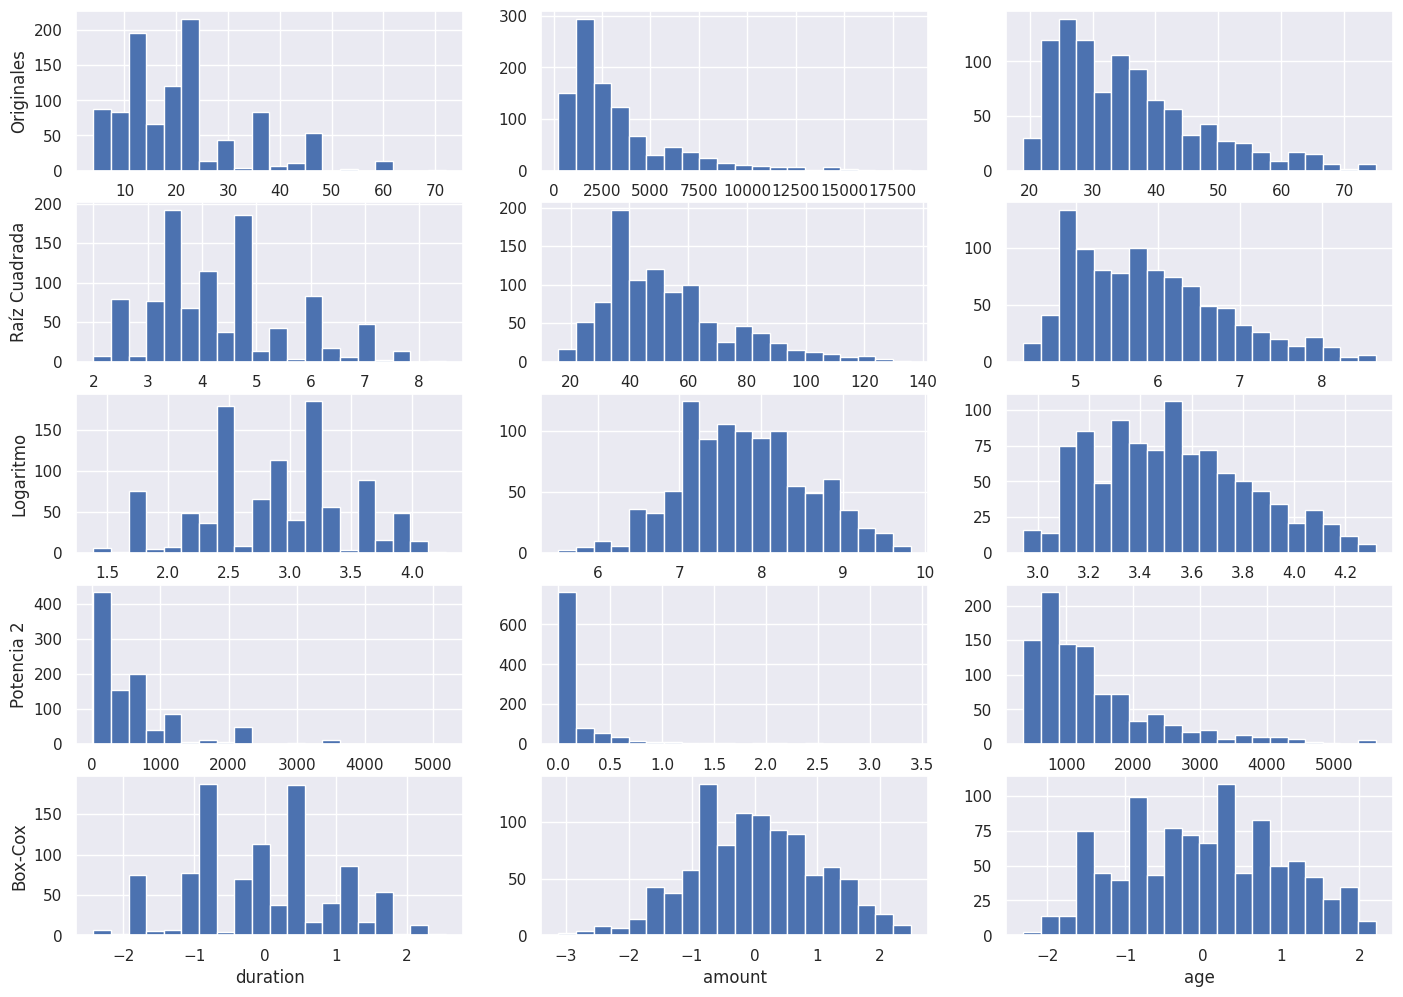

In [ ]:
#Pre visualization

variables_a_transformar = [ 'duration',  'amount',  'age']


sns.set(rc={'figure.figsize':(17,12)})
fig, axes = plt.subplots(5, 3)

for k in range(0,3):

    #Datos originales
    plt.subplot(5,3,k+1)


    Transf0 = X[variables_a_transformar[k]]          # Transf0 los valores de cada variable "k" sin transformar.
    plt.hist(Transf0, bins=20)                    #Comando para obtener el histograma de Transf0 con 20 barras (bins).


    plt.xlabel(variables_a_transformar[k])
    if k==0:
      plt.ylabel('Originales')



    #Datos transformados con raíz cuadrada
    plt.subplot(5,3,k+4)

    Transf1 = np.sqrt(X[variables_a_transformar[k]])          #Raíz cuadrada a los valores de cada variable "k" sin transformar.
    plt.hist(Transf1, bins=20)                      #Comando para obtener el histograma de Transf1 con 20 barras (bins).


    plt.xlabel(variables_a_transformar[k])
    if k==0:
      plt.ylabel('Raíz Cuadrada')



    #Datos transformados con logaritmo natural
    plt.subplot(5,3,k+7)

    Transf2 = np.log(X[variables_a_transformar[k]])          #Logaritmo natural a los valores de cada variable "k" sin transformar.
    plt.hist(Transf2, bins=20)                    #Comando para obtener el histograma de Transf2 con 20 barras (bins).


    plt.xlabel(variables_a_transformar[k])
    if k==0:
      plt.ylabel('Logaritmo')

    #Datos transformados con la potencia de 2
    plt.subplot(5,3,k+10)

    Transf3 = np.power(X[variables_a_transformar[k]],2)          #Elevar al cuadrado los valores de cada variable "k" sin transformar.
    plt.hist(Transf3, bins=20)                    #Comando para obtener el histograma de Transf3 con 20 barras (bins).


    plt.xlabel(variables_a_transformar[k])
    if k==0:
      plt.ylabel('Potencia 2')


    #Datos transformados con Box-Cox
    plt.subplot(5,3,k+13)


    Transf4 = power_transform(X[variables_a_transformar[k]].to_numpy().reshape(-1, 1), method='box-cox')        #Transformación Box-Cox a los valores de cada variable "k" sin transformar.
    plt.hist(Transf4, bins=20)                     #Comando para obtener el histograma de Transf4 con 20 barras (bins).


    plt.xlabel(variables_a_transformar[k])
    if k==0:
      plt.ylabel('Box-Cox')

plt.show()

Por medio del grafico podemos observar algunos valores atipicos que nos podrian generar distorsion en el escalamiento o podemos realizar una transformacion box-cox que pueda ademas de tratar estos outliers ayudar a que los datos tengan una normalizacion, para ayudar a la convergencia de los datos

(36, 20)


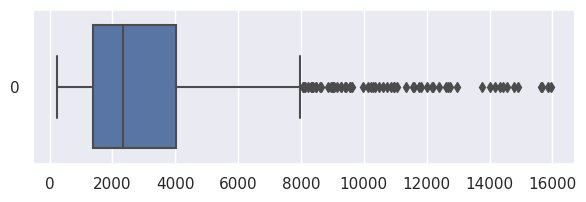

(14, 20)


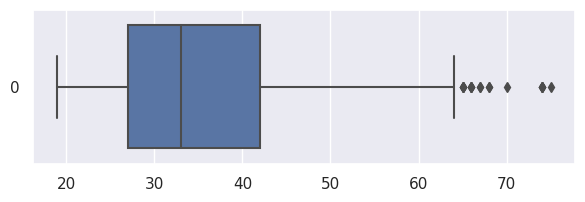

(14, 20)


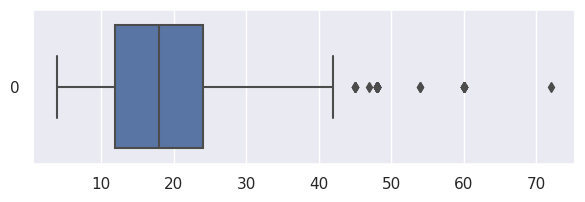

In [ ]:
#Creación de histogramas numéricas
sns.set(rc={"figure.figsize": (7, 2)})
fig.tight_layout(h_pad=5.0) #espacio entre gráficas


print(X_tv[X_tv.amount > 10000].shape )
sns.boxplot(X_tv.amount, orient = "h")
plt.show()
print(X_tv[X_tv.age > 65].shape)
sns.boxplot(X_tv.age, orient = "h")
plt.show()
print(X_tv[X_tv.duration > 50].shape)
sns.boxplot(X_tv.duration, orient = "h")
plt.show()

In [ ]:
print(X_tv.isna().any())
print(X_tv.isnull().any())

status                     False
duration                   False
credit_history             False
purpose                    False
amount                     False
savings                    False
employment_duration        False
installment_rate           False
personal_status_sex        False
other_debtors              False
present_residence          False
property                   False
age                        False
other_installment_plans    False
housing                    False
number_credits             False
job                        False
people_liable              False
telephone                  False
foreign_worker             False
dtype: bool
status                     False
duration                   False
credit_history             False
purpose                    False
amount                     False
savings                    False
employment_duration        False
installment_rate           False
personal_status_sex        False
other_debtors              Fals

Consideramos aplicar las siguientes aplicaciones a las variables numericas

Se aplica una transformación One-Hot a las variables binarias

In [ ]:
#Transformaciones a factores numéricos de entrada:
num_pipeline = Pipeline(steps = [('impMediana', SimpleImputer(strategy='median')),
                                 ('escalaNum', MinMaxScaler(feature_range=(1,2))),
                                 ('BoxCoxTransf', PowerTransformer())])
num_pipeline_nombres = [ 'duration',  'amount',  'age']

#Transformaciones a factores categóricos y binarias de entrada:
catImp_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent')),
                                    ('OneHotE', OneHotEncoder(drop='first'))])
catImp_pipeline_nombres = ['status', 'credit_history', 'purpose', 'savings',
       'personal_status_sex','other_debtors', 'other_installment_plans', 'housing',
       'people_liable', 'telephone', 'foreign_worker']


#Ordinales number_credits,job,property,present_residence,installment_rate,employment_duration
ord_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent'))])
ord_pipeline_nombres = ["job","property","number_credits","present_residence",
                        "installment_rate","employment_duration"]

#Conjuntamos las transformaciones numéricas y categóricas que se estarán aplicando a los datos de entrada:
columnasTransformer = ColumnTransformer(transformers = [
    ('numpipe', num_pipeline, num_pipeline_nombres),
    ('catimp', catImp_pipeline, catImp_pipeline_nombres),
    ('ordimp', ord_pipeline, ord_pipeline_nombres)
    ],
    remainder='passthrough')

### **Comentario Ejercicio 3**

Los datos que estamos utilizando para la concesión de créditos es bastante completa y no presenta datos perdidos tanto para las variables numéricas, ordinales y categóricas, sin embargo, supongamos que este modelo lo queremos poner en producción, en ese caso, es necesario defenir una baseline para el preprocesamiento de datos, dado que puede suceder que en alguno de los meses la información venga con algunas novedades.

Para las variables numéricas, dado su marcada asimetría hacia la derecha se considera que sería oportuno utilizar la mediana para evitar un imputación de datos sesgada al utilizar la media. Además, por la asimetría se utiliza una transformación box-cox, para ayudar a la convergencia de los algoritmos de las métricas de optimización.

En cuanto los datos categóricos se utilizará la moda para imputar los datos y se utilizará One-Hot encoding dado que estas no tienen un orden de importancia que esté relacionado a su valor, por ejemplo, es indistinto colocar el valor 0 o 1 a hombre o mujer.

Las variables ordinales serán también completadas con la moda, al ser un valor discreto y no se les aplicará One-Hot encoding, pues estas si tienen importancia en su nivel, es decir, el orden de la etiqueta implica mayor o menor valor en la variable que describen.

Finalmente, para las variables binarias, se aplicará la moda para completarse la información de ser el caso y **tampoco se les realizará One-Hot encoding**, puesto que ya les dimos este esquema en el ejercicio 1, pues a las variables binarias les asignamos el valor de 1 cuando es 2 y 0 cuando es 1. Esto lo relizamos debido a que no son ordinales, es decir 1 no es superior o inferior a 2 y porque consideramos que tiene que darse este paso para toda la información en general.

#**Ejercicio 4.**



## a.- b.- c.-

In [ ]:
#Definicion de modelos a entrenar
def get_models():
  modelos = list()
  nombres = list()

  #LR - Regresión Logística:
  modelos.append(LogisticRegression(random_state=1, max_iter = 2000))
  nombres.append('LR')

  #DT - Árbol de Decisión:
  modelos.append(DecisionTreeClassifier(random_state=1))
  nombres.append('DT')

  #RF - Bosque aleatorio:
  modelos.append(RandomForestClassifier(random_state=1))
  nombres.append('RF')

  return modelos, nombres

#Recall

def mi_recall(yreal, ypred):

  cm = confusion_matrix(yreal, ypred)
  recall = cm.flatten()[3]/(cm.flatten()[3]+cm.flatten()[2])

  return recall

#Precision
def mi_precision(yreal, ypred):

  cm = confusion_matrix(yreal, ypred)
  precision = cm.flatten()[3]/(cm.flatten()[3]+cm.flatten()[1])

  return precision

#G-mean
def mi_gmean(yreal, ypred):

     cv = confusion_matrix(yreal, ypred).ravel()
     gmean = np.sqrt((cv[3]/(cv[3]+cv[2]))*(cv[0]/(cv[0]+cv[1])))

     return gmean

#f1-score
def mi_f1_score(yreal, ypred):

     precision = mi_precision(yreal, ypred)
     recall = mi_recall(yreal, ypred)
     f1_score = 2*((precision*recall)/(precision+recall))

     return f1_score

#Accuracy
def mi_accuracy(yreal,ypred):
  cm = confusion_matrix(yreal, ypred)
  accuracy = (cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])
  return accuracy

In [ ]:
modelos, nombres = get_models()
resultados = list()

for i in range(len(modelos)):

  #Modelo
  #Pipeline
  model = modelos[i]
  kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
  pipe = make_pipeline((columnasTransformer), (model))

  #Metricas
  mismetricas = {'accuracy':make_scorer(mi_accuracy),
                 'precision':make_scorer(mi_precision),
                 'recall':make_scorer(mi_recall),
                 'gmean':make_scorer(mi_gmean),
                 'f1_score':make_scorer(mi_f1_score)}

  resultadosOU = cross_validate(estimator = pipe,
                                X = X_tv,
                                y = ytv,
                                scoring = mismetricas,
                                return_train_score = True,
                                cv = kfold)

  resultados.append(resultadosOU)
  # X_tv, X_test, ytv, y_test

  print(
      '%s:\nmean Train Accuracy: %.3f (%.4f)\nmean Train Precision: %.3f (%.4f)\nmean Train Recall: %.3f (%.4f)\nmean Train Gmean: %.3f (%.4f)\nmean Train f1-score: %.3f (%.4f)\n-------\nmean Test Accuracy: %.3f (%.4f)\nmean Test Precision: %.3f (%.4f)\nmean Test Recall: %.3f (%.4f)\nmean Test Gmean: %.3f (%.4f)\nmean Test f1-score: %.3f (%.4f)\n' % (nombres[i],
                                                                          np.mean(resultadosOU['train_accuracy']),
                                                                          np.std(resultadosOU['train_accuracy']),
                                                                          np.mean(resultadosOU['train_precision']),
                                                                          np.std(resultadosOU['train_precision']),
                                                                          np.mean(resultadosOU['train_recall']),
                                                                          np.std(resultadosOU['train_recall']),
                                                                          np.mean(resultadosOU['train_gmean']),
                                                                          np.std(resultadosOU['train_gmean']),
                                                                          np.mean(resultadosOU['train_f1_score']),
                                                                          np.std(resultadosOU['train_f1_score']),
                                                                          np.mean(resultadosOU['test_accuracy']),
                                                                          np.std(resultadosOU['test_accuracy']),
                                                                          np.mean(resultadosOU['test_precision']),
                                                                          np.std(resultadosOU['test_precision']),
                                                                          np.mean(resultadosOU['test_recall']),
                                                                          np.std(resultadosOU['test_recall']),
                                                                          np.mean(resultadosOU['test_gmean']),
                                                                          np.std(resultadosOU['test_gmean']),
                                                                          np.mean(resultadosOU['test_f1_score']),
                                                                          np.std(resultadosOU['test_f1_score'])
                                                                          )
      )

LR:
mean Train Accuracy: 0.796 (0.0070)
mean Train Precision: 0.821 (0.0058)
mean Train Recall: 0.906 (0.0098)
mean Train Gmean: 0.699 (0.0116)
mean Train f1-score: 0.861 (0.0050)
-------
mean Test Accuracy: 0.758 (0.0286)
mean Test Precision: 0.798 (0.0181)
mean Test Recall: 0.876 (0.0346)
mean Test Gmean: 0.649 (0.0399)
mean Test f1-score: 0.835 (0.0211)

DT:
mean Train Accuracy: 1.000 (0.0000)
mean Train Precision: 1.000 (0.0000)
mean Train Recall: 1.000 (0.0000)
mean Train Gmean: 1.000 (0.0000)
mean Train f1-score: 1.000 (0.0000)
-------
mean Test Accuracy: 0.709 (0.0357)
mean Test Precision: 0.794 (0.0304)
mean Test Recall: 0.790 (0.0416)
mean Test Gmean: 0.637 (0.0503)
mean Test f1-score: 0.791 (0.0267)

RF:
mean Train Accuracy: 1.000 (0.0000)
mean Train Precision: 1.000 (0.0000)
mean Train Recall: 1.000 (0.0000)
mean Train Gmean: 1.000 (0.0000)
mean Train f1-score: 1.000 (0.0000)
-------
mean Test Accuracy: 0.763 (0.0223)
mean Test Precision: 0.784 (0.0132)
mean Test Recall: 0.9

## d.-

entrenamiento


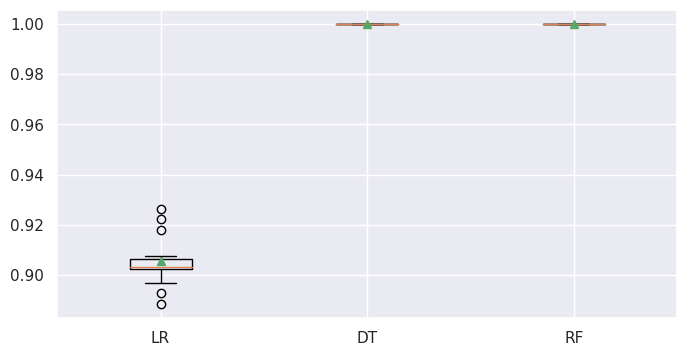

validacion


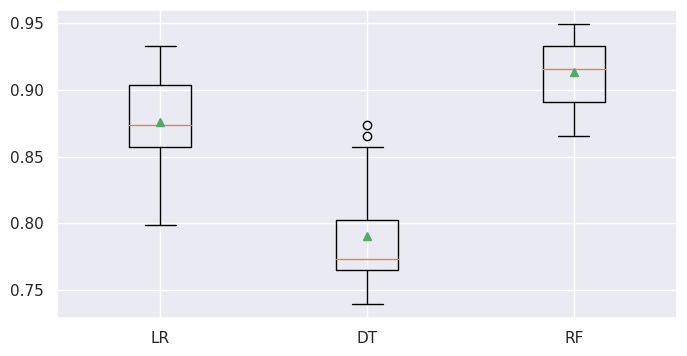

In [ ]:
print("entrenamiento")
sns.set(rc={'figure.figsize':(8,4)})
bpRecall = list()
for i in range(len(resultados)):
  rr = resultados[i]['train_recall']
  bpRecall.append(rr)

plt.boxplot(bpRecall, labels=nombres, showmeans=True)
plt.show()
print("validacion")
bpRecall = list()
for i in range(len(resultados)):
  rr = resultados[i]['test_recall']
  bpRecall.append(rr)

plt.boxplot(bpRecall, labels=nombres, showmeans=True)
plt.show()

**Comentario ejercicio 4 (a, b, c)**

Los resultados exhiben un marcado caso de sobreentrenamiento en los modelos de árbol de decisión y bosque aleatorio (random forest), ya que logran alcanzar valores de 1 en las métricas de precisión, exhaustividad (recall), puntuación F1, media geométrica (G-mean) y exactitud (accuracy) durante el entrenamiento, pero estos valores disminuyen al evaluar los modelos con los datos de validación. Es especialmente notable en el caso del árbol de decisión, donde se observa una disminución significativa, alcanzando valores entre el 60% y el 70%. Por otro lado, el bosque aleatorio parece no verse tan afectado por el sobreentrenamiento, ya que sus métricas oscilan entre el 60% y el 91%, mostrando un mejor rendimiento en exhaustividad (recall) que en precisión.

En contraste, la regresión logística se destaca como el modelo con el mejor rendimiento al no presentar ni sobreajuste ni subajuste.

**Comentario del ejercicio 4 (d)**

 Los diagramas de caja confirman nuestras suposiciones anteriores. Se observa que tanto el árbol de decisión como el bosque aleatorio muestran valores perfectos de 100% en la exhaustividad (recall), sin ninguna variación. Por otro lado, la regresión logística exhibe oscilaciones en esta métrica.

## e. Curvas de Aprendizaje

In [ ]:
def mi_LearningCurvePlot(train_sizes, train_scores, val_scores,
                         ejeyName = "f1-score", ejexName = 'Tamaño del conjunto de entrenamiento',
                         tituloGraph = 'Curvas de Aprendizaje incrementando el tamaño de la muestra'):
    # Argumentos de entrada de la función mi_LearningCurvePlot:
    #      train_sizes : número de observaciones en el conjunto de entrenamiento.
    #      train_scores : Exactitud de cada partición en el proceso de Validación-Cruzada (VC) en los datos de entrenamiento.
    #                     La dimensión de este conjunto es (pxq)
    #                                     donde p="número de particiones de manera incremental del conjunto de entrenamiento".
    #                                           q="número de particiones de VC" * "número de repeticiones de VC con RepitedStratifiedCV"
    #      val_scores : Exactitud de cada partición en el proceso de Validación-Cruzada en los datos de validación.
    #                   Es de la misma dimensión que los train_scores.
    # Output: la salida es el gráfico con las curvas de aprendizaje.

    # Obtenemos los promedios y desviaciones estándar de cada renglón de los resultados de entrenamiento y validación
    # La dimensión de cada uno es p="número de particiones de manera incremental del conjunto de entrenamiento".

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    #Graficamos las curvas de aprendizaje incluyendo una región indicando la desviación estándar.
    plt.figure(figsize=(7,6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.1, color='blue')

    plt.plot(train_sizes, val_mean, color='red', marker='+', markersize=5, linestyle='--', label='Validation')
    plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.1, color='red')

    plt.title(tituloGraph)
    plt.xlabel(ejexName)
    plt.ylabel(ejeyName)
    plt.grid()
    plt.legend(loc='lower left')
    plt.show()

def mi_ModeloYCurvas(X_tv_set, y_tv_set, modelo_aplica,
                     columnasTransformer_aplicar, metrica = 'f1',
                     modelos_tipo = 1,
                     ejeyName = "f1-score", ejexName = 'Tamaño del conjunto de entrenamiento',
                     tituloGraph = 'Curvas de Aprendizaje incrementando el tamaño de la muestra'):

  pipe = columnasTransformer_aplicar
  Xx = pipe.fit_transform(X_tv_set)

  mi_kfold = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 3, random_state=7)

  if(modelos_tipo == 1):

    delta_train_sz = np.linspace(0.1, 1, 20)
    tr_sizes, tr_scores, val_scores = learning_curve(estimator = modelo_aplica,
                                                    X = X_tv_set,
                                                    y = y_tv_set,
                                                    cv = mi_kfold,
                                                    train_sizes = delta_train_sz,
                                                    scoring=metrica,
                                                    random_state=7)
    #Obtenemos el gráfico con las curvas de aprendizaje:
    mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores, ejeyName, ejexName, tituloGraph)

  if(modelos_tipo == 2):

    delta_train_sz = np.linspace(1, 20, 20)
    train_scores, valid_scores = validation_curve(modelo_aplica,
                                                  X = X_tv_set,
                                                  y = y_tv_set,
                                                  param_name="max_depth",
                                                  param_range = delta_train_sz,
                                                  cv= mi_kfold,
                                                  scoring=metrica)

    #Obtenemos el gráfico con las curvas de aprendizaje:
    mi_LearningCurvePlot(delta_train_sz, train_scores, valid_scores, ejeyName, ejexName, tituloGraph)


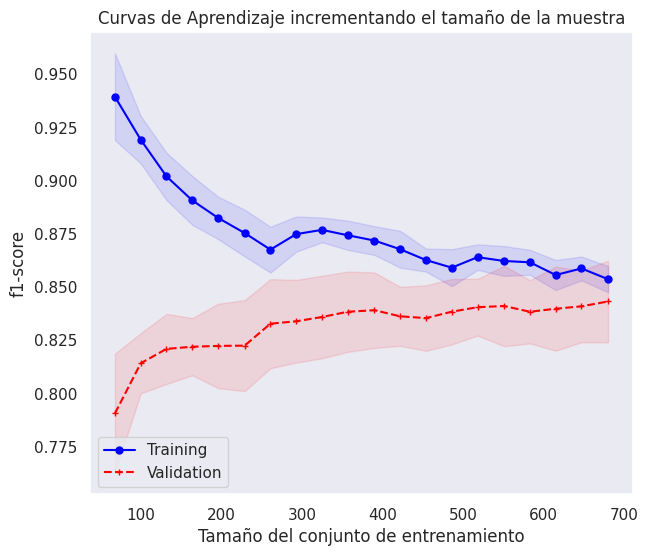

In [ ]:
model, nombres = get_models()
#Regresion logistica
#Learning_curve()

mi_ModeloYCurvas(X_tv, ytv, model[0], columnasTransformer)

**Comentario e. i**

Es cierto que a medida que se proporciona más cantidad de datos al modelo, éste tiende a mostrar mejores resultados. Esto se debe a que el modelo tiene la oportunidad de aprender de una mayor cantidad de información, lo cual puede conducir a una mejora en su rendimiento.

En este caso, no se observan indicios de que el modelo esté sobreajustado o subajustado, ya que las curvas de aprendizaje no se solapan y la curva de validación no supera a la de entrenamiento. Esto es una señal positiva, ya que indica que el modelo no está memorizando los datos de entrenamiento ni generalizando de manera deficiente.

La caída inicial en el puntaje F1 del conjunto de entrenamiento puede ser interpretada como una evolución positiva del modelo, ya que está ajustándose de manera más precisa a la realidad a medida que se expone a más datos.

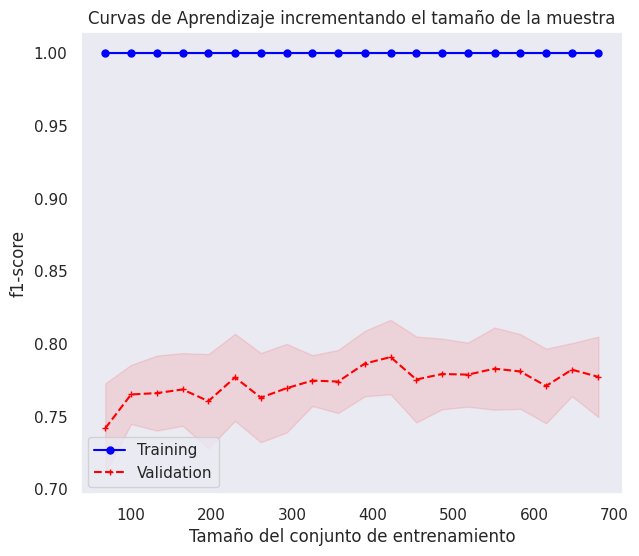

In [ ]:
#Arbol de decision
mi_ModeloYCurvas(X_tv, ytv, model[1], columnasTransformer)

**Comentario e. ii**

Es evidente que a medida que aumentamos la profundidad del modelo de árbol de decisión, este tiende a memorizar los datos en lugar de aprender a predecirlos de manera generalizada. Esto se refleja en la obtención de valores de f1-score iguales a 1 en el conjunto de entrenamiento, lo cual indica un ajuste perfecto a los datos de entrenamiento. Sin embargo, este alto rendimiento no se mantiene en el conjunto de validación, donde la métrica disminuye.

Este comportamiento sugiere que el modelo de árbol de decisión está sobreajustándose a los datos de entrenamiento y no logra generalizar correctamente para nuevos datos. Al aumentar la profundidad del árbol, se permite una mayor complejidad y capacidad de memorización, lo que conduce a una sobreoptimización de los datos de entrenamiento y a una disminución en el rendimiento en datos no vistos anteriormente.

Es importante encontrar un equilibrio en la profundidad del árbol de decisión para evitar el sobreajuste y permitir que el modelo aprenda patrones más generales y aplicables a nuevos datos.

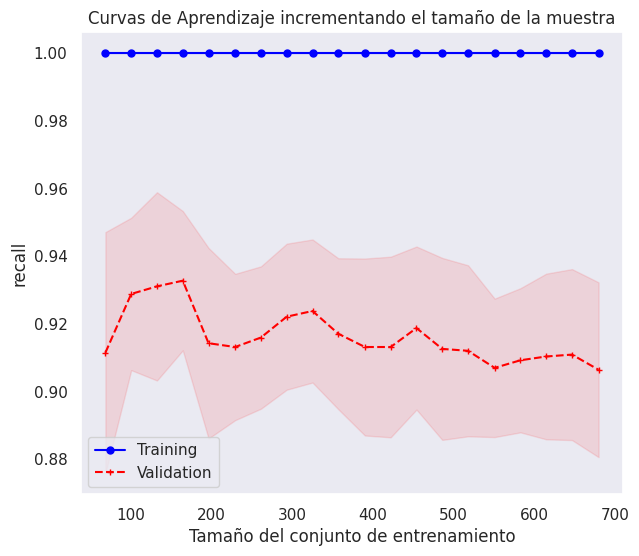

In [ ]:
#Random forest
mi_ModeloYCurvas(X_tv, ytv, model[2], columnasTransformer, metrica = 'recall', ejeyName = "recall")

**Comentario e. iii**

El modelo de Random Forest muestra evidencia de sobreentrenamiento desde el inicio hasta la última muestra de información. Además, no logra mejorar su rendimiento en el conjunto de validación.

El hecho de que Random Forest sea un modelo de ensamble puede explicar su mejor desempeño en la validación en comparación con el Decision Tree individual. Al ser un ensamble de múltiples árboles, el modelo de Random Forest tiene en cuenta la formación de varios árboles y sus correspondientes votaciones. Esto ayuda a reducir el sesgo que podría estar presente en un solo árbol de decisión.

El proceso de votación y promedio de predicciones de varios árboles en Random Forest ayuda a mitigar el impacto del sobreentrenamiento y aumenta la capacidad del modelo para generalizar mejor a nuevos datos. Esto se traduce en un rendimiento más robusto y una menor tendencia al sobreajuste en comparación con un solo árbol de decisión.

#**Ejercicio-5.**



## Regresion logistica a.- y b.-

c, solver, class_weight y penalty

In [ ]:
#Regularizacion: ridge l2
modelo = LogisticRegression(max_iter=10000, random_state=7)

dicc_grid = {'penalty': ['l1','l2'],
             'class_weight': ['balanced',None],
             'C':[0.0001,0.01,0.1, 0.15, 0.2, 0.3, 1.0,10.,20.],
             'solver':['liblinear','saga']
             }

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)

grid = GridSearchCV(estimator=modelo,
                    param_grid=dicc_grid,
                    cv=cv,
                    scoring='f1')

#Transformamos los datos de entrada:
Xx = columnasTransformer.fit_transform(X_tv)

grid.fit(Xx, np.ravel(ytv))

print('Mejor valor de f1 obtenido con la mejor combinación:', grid.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', grid.best_params_)
print('Métrica utilizada:', grid.scoring)

Mejor valor de f1 obtenido con la mejor combinación: 0.8418089636729114
Mejor combinación de valores encontrados de los hiperparámetros: {'C': 0.15, 'class_weight': None, 'penalty': 'l2', 'solver': 'saga'}
Métrica utilizada: f1


**Comentarios 5. a**

Es acertado utilizar la métrica f1-score para entrenar el modelo de regresión logística, ya que busca obtener un buen rendimiento en términos de precisión y recall de manera combinada. Al utilizar f1-score, estamos buscando un modelo que prediga bien tanto la clase positiva como la clase negativa.

Normalmente, f1-score se utiliza en casos de conjuntos de datos balanceados. En este caso, dado que hemos probado el parámetro class_weight y el GridSearchCV no consideramos necesario utilizarlo, podemos utilizar f1-score sin problemas.

El valor de f1-score obtenido del modelo es del 84%, lo cual puede considerarse aceptable ya que indica que tenemos buenos resultados tanto en precisión como en recall.

Es importante destacar que en GridSearchCV solo se puede optimizar hacia una única métrica y, en este caso, f1-score es ideal, ya que considera de manera equitativa tanto la precisión como el recall. Esto nos permite buscar un equilibrio entre ambas métricas y obtener un modelo con un buen rendimiento global.

In [ ]:
LogisticModel = LogisticRegression(penalty = 'l2', class_weight = None, solver = 'saga', C = 0.20, max_iter = 10000, random_state=7)

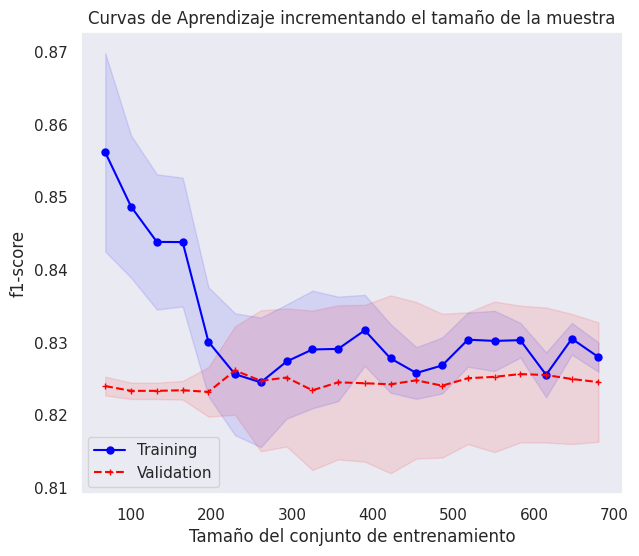

In [ ]:
mi_ModeloYCurvas(X_tv, ytv, LogisticModel, columnasTransformer)

## Arbol de decision c.- y d.-

ccp_alpha, criterion, max_depth, min_samples_split y class_weight

In [ ]:
#Regularizacion: ridge l2
modelo = DecisionTreeClassifier(random_state=7)

dicc_grid = {'criterion': ['gini','entropy'],
             'ccp_alpha': [0.1, 0.2, 0.4, 0.7, 0.01],
             'class_weight': ['balanced',None],
             'max_depth':[2, 4, 6, 8, 12, 16],
             'min_samples_split':[5, 10, 15, 20, 30, 50]
             }

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)

grid = GridSearchCV(estimator=modelo,
                    param_grid=dicc_grid,
                    cv=cv,
                    scoring='precision')

#Transformamos los datos de entrada:
Xx = columnasTransformer.fit_transform(X_tv)

grid.fit(Xx, np.ravel(ytv))


print('Mejor valor de precision obtenido con la mejor combinación:', grid.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', grid.best_params_)
print('Métrica utilizada:', grid.scoring)

Mejor valor de precision obtenido con la mejor combinación: 0.8835724707447891
Mejor combinación de valores encontrados de los hiperparámetros: {'ccp_alpha': 0.01, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 50}
Métrica utilizada: precision


**Comentarios 5. c**

La precisión es una métrica adecuada cuando nuestro objetivo principal es reducir los falsos positivos. La precisión se enfoca en medir la proporción de instancias clasificadas como positivas que realmente son positivas.

En determinados casos, no es igualmente importante reducir los falsos negativos que los falsos positivos, y la elección entre precisión y recall dependerá del contexto y de las consecuencias de cada tipo de error.

Sin embargo, podemos considerar también que es mas costoso negarle un credito a un cliente bueno (falso negativo);
se necesitan conocer las politicas del banco, consecuencias o historial de crecimientos y el contexto de la empresa para decidir adecuadamente

Tomando como ejemplo la concesión de tarjetas de crédito, donde es más costoso otorgar una tarjeta a alguien que no pueda cumplir con los pagos, es preferible evitar los falsos positivos, es decir, evitar otorgar una tarjeta a personas que realmente no son buenos prospectos. En este caso, maximizar la precisión sería una estrategia adecuada.

Si el modelo alcanza un valor de precisión del 88% mediante la optimización de GridSearch, esto significa que solo estaría otorgando tarjetas de crédito a un 22% de posibles malos prospectos, lo cual puede considerarse un resultado adecuado para minimizar los falsos positivos y evitar el riesgo asociado a entregar tarjetas de crédito a personas no solventes.

In [ ]:
dTreeClasf = DecisionTreeClassifier(criterion = 'gini', ccp_alpha = 0.01, class_weight = 'balanced',
                                    max_depth = 4, min_samples_split =50)

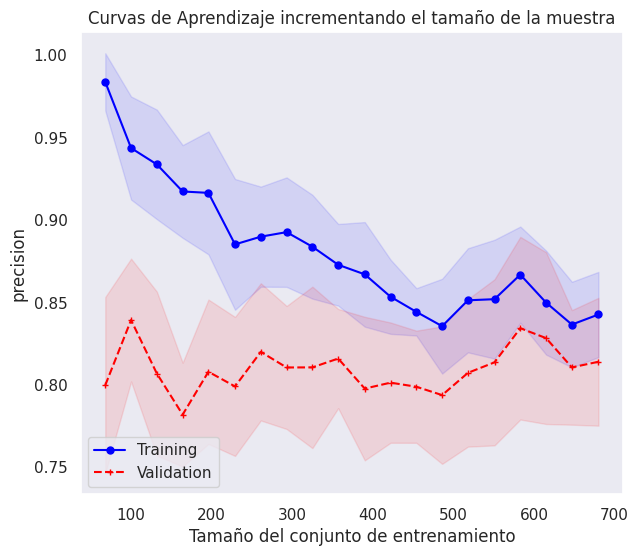

In [ ]:
mi_ModeloYCurvas(X_tv, ytv, dTreeClasf, columnasTransformer, metrica = 'precision', ejeyName = 'precision')

## random forest e.- y f.-

 ccp_alpha, criterion, max_depth, min_samples_split y class_weight

In [ ]:
#Regularizacion: ridge l2
modelo = RandomForestClassifier(random_state=7)

dicc_grid = {'criterion': ['gini','entropy'],
             'ccp_alpha': [0.001, 0.01, 1.0],
             'class_weight': ['balanced',None],
             'max_depth':[1,2,3,4,5,6],
             'min_samples_split':[5, 10, 15]
             }

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)

grid = GridSearchCV(estimator=modelo,
                    param_grid=dicc_grid,
                    cv=cv,
                    scoring='recall')

#Transformamos los datos de entrada:
Xx = columnasTransformer.fit_transform(X_tv)

grid.fit(Xx, np.ravel(ytv))

print('Mejor valor de recall obtenido con la mejor combinación:', grid.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', grid.best_params_)
print('Métrica utilizada:', grid.scoring)

Mejor valor de recall obtenido con la mejor combinación: 1.0
Mejor combinación de valores encontrados de los hiperparámetros: {'ccp_alpha': 0.001, 'class_weight': None, 'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 5}
Métrica utilizada: recall


**Comentarios 5. e**

El recall es una métrica que se utiliza cuando el objetivo principal es reducir los falsos negativos. El recall mide la proporción de instancias positivas que son correctamente identificadas por el modelo.

En algunos casos, la importancia de reducir los falsos negativos puede ser mayor que reducir los falsos positivos, y la elección entre precisión y recall dependerá del contexto y las implicaciones de cada tipo de error.

Siguiendo el ejemplo de la concesión de tarjetas de crédito, donde es menos costoso no otorgar una tarjeta a una persona que pueda cumplir con los pagos y perder un porcentaje de beneficio, es preferible evitar los falsos positivos, es decir, no otorgar tarjetas a personas que no puedan cumplir con los pagos. En este caso, maximizar el recall sería una estrategia adecuada.

Si la optimización de GridSearch alcanza un valor de recall del 100%, esto significa que no estaríamos dejando pasar ninguna instancia positiva relevante y estaríamos evitando completamente los falsos negativos. Esto puede considerarse un resultado adecuado en términos de reducir los falsos negativos y asegurarnos de no otorgar tarjetas de crédito a personas que no sean solventes.

In [ ]:
randomTreeClasf = RandomForestClassifier(criterion = 'gini', ccp_alpha = 0.001,
                                    max_depth = 5, min_samples_split =5)

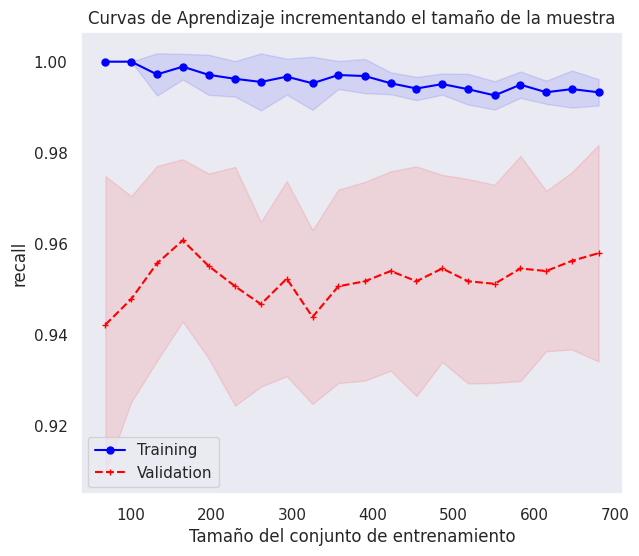

In [ ]:
mi_ModeloYCurvas(X_tv, ytv, randomTreeClasf, columnasTransformer, metrica = 'recall', ejeyName = 'recall')

**Cambio de Max_Deth:** Se cambio el valor del parámetro a 5 para obtener un resultado del modelo. Observamos que la variación entre los datos es menor y no hay bias.

#**Ejercicio-6.**


## Regresion logistica a.-

In [ ]:
LogisticModel = LogisticRegression(penalty = 'l2', class_weight = None, solver = 'saga',
                                   C = 0.2, max_iter = 10000, random_state=7)

In [ ]:
#Transformacion de informacion
prepro = columnasTransformer.fit(X_tv)
X_testTransf = prepro.fit_transform(X_test)

#Entrenamiento
LgMejorado = LogisticModel.fit(prepro.fit_transform(X_tv), ytv)
y_hat = LgMejorado.predict(X_testTransf)
mi_f1_score(y_test, y_hat)

0.8177777777777778

**Comentarios 6. a**

Es alentador observar que el modelo logró un buen desempeño en los datos de prueba, considerando la métrica f1-score. Un valor de 81.7% es cercano a los resultados obtenidos en los conjuntos de entrenamiento y validación, que son 85% y 82.5%, respectivamente.

El hecho de que el modelo mantenga un rendimiento similar en los datos de prueba, a pesar de no haber sido vistos anteriormente, sugiere que el modelo tiene la capacidad de generalizar y hacer predicciones precisas en nuevos datos.

El conjunto de prueba proporciona una evaluación imparcial del modelo, ya que son datos que no se utilizaron durante el entrenamiento ni la validación. Si el modelo logra mantener un buen desempeño en estos datos, es una indicación de que puede hacer predicciones precisas en la realidad.

En resumen, el hecho de que el modelo haya sostenido su desempeño en los datos de prueba sugiere que es capaz de predecir de manera efectiva la realidad y puede considerarse un buen resultado en términos de capacidad de generalización y aplicabilidad del modelo a nuevos datos.


## Arbol de decision b.-

In [ ]:
dTreeClasf = DecisionTreeClassifier(criterion = 'gini', ccp_alpha = 0.01, class_weight = 'balanced',
                                    max_depth = 4, min_samples_split =50)

In [ ]:
#Entrenamiento de arbol de decision
descTreeMejorado = dTreeClasf.fit(prepro.fit_transform(X_tv), ytv)
y_hat = descTreeMejorado.predict(X_testTransf)
mi_precision(y_test, y_hat)

0.8979591836734694

[Text(0.4444444444444444, 0.875, 'x[5] <= 0.5\ngini = 0.5\nsamples = 850\nvalue = [425.0, 425.0]'),
 Text(0.2222222222222222, 0.625, 'x[0] <= 0.387\ngini = 0.467\nsamples = 509\nvalue = [356.667, 210.714]'),
 Text(0.1111111111111111, 0.375, 'gini = 0.499\nsamples = 289\nvalue = [155.0, 140.0]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.384\nsamples = 220\nvalue = [201.667, 70.714]'),
 Text(0.6666666666666666, 0.625, 'x[1] <= 0.659\ngini = 0.367\nsamples = 341\nvalue = [68.333, 214.286]'),
 Text(0.5555555555555556, 0.375, 'gini = 0.274\nsamples = 258\nvalue = [33.333, 170.0]'),
 Text(0.7777777777777778, 0.375, 'x[40] <= 3.5\ngini = 0.493\nsamples = 83\nvalue = [35.0, 44.286]'),
 Text(0.6666666666666666, 0.125, 'gini = 0.47\nsamples = 46\nvalue = [31.667, 19.286]'),
 Text(0.8888888888888888, 0.125, 'gini = 0.208\nsamples = 37\nvalue = [3.333, 25.0]')]

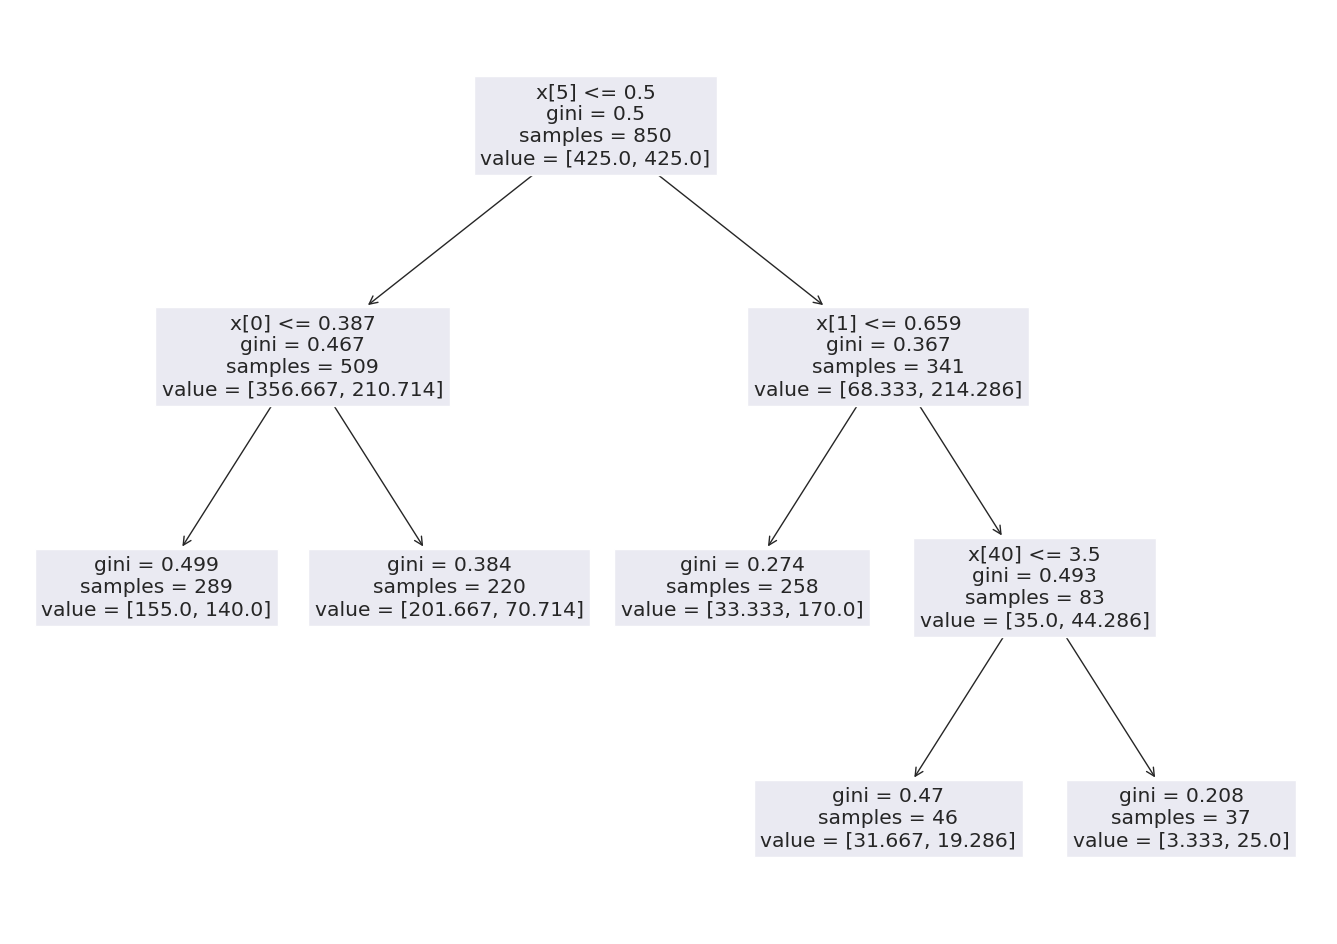

In [ ]:
sns.set(rc={'figure.figsize':(17,12)})
plot_tree(descTreeMejorado)
# plt.show

**Comentarios 6. b**

El modelo logró un buen desempeño en los datos de prueba, considerando la métrica de precisión. Un valor de 89.79% es cercano a los resultados obtenidos en los conjuntos de entrenamiento y validación, que son 88.4% y 82.5%, respectivamente.

El hecho de que el modelo mantenga y supere ligeramente su desempeño en los datos de prueba, a pesar de no haber sido vistos anteriormente, sugiere que el modelo puede hacer predicciones precisas en situaciones de la realidad y es capaz de identificar correctamente a la mayoría de los clientes buenos.

Al obtener una precisión cercana al 90% en el conjunto de prueba, significa que el modelo está clasificando correctamente alrededor del 90% de las instancias como verdaderos positivos (buenos clientes) y está reduciendo los falsos positivos (malos clientes). Esto implica que estamos dejando entrar aproximadamente el 10% de malos clientes, lo cual es un resultado prometedor.

El hecho de que el modelo pueda mantener y superar el desempeño en los datos de prueba sugiere que puede predecir efectivamente la realidad y tener una aplicación práctica en la identificación de buenos y malos clientes.


#Random forest c.

In [ ]:
randomTreeClasf = RandomForestClassifier(criterion = 'gini', ccp_alpha = 0.001, max_depth = 5, min_samples_split =5)

In [ ]:
#Entrenamiento de arbol de decision
RandomForestMejorado = randomTreeClasf.fit(prepro.fit_transform(X_tv), ytv)
y_hat = RandomForestMejorado.predict(X_testTransf)
mi_recall(y_test, y_hat)

0.9523809523809523

**Comentarios 6. c**

Es prudente cuestionar el valor de recall igual a 1 obtenido a través de GridSearch para el modelo de Random Forest, ya que puede ser indicativo de un sobreentrenamiento o un ajuste excesivo a los datos de entrenamiento. Es importante tener en cuenta que un recall de 1 implica que no se está dejando pasar ningún positivo real, lo cual puede resultar poco realista en muchos casos.

En lugar de confiar únicamente en los resultados de GridSearch, es recomendable analizar las curvas de validación para determinar la profundidad óptima del Random Forest. Al observar estas curvas, se puede identificar el punto en el que el modelo alcanza un buen equilibrio entre el sesgo y la varianza, evitando así problemas de sobreentrenamiento o subajuste.

A partir de este análisis, se determina que una profundidad de 4 o 5 podría ser la más adecuada para el modelo final de Random Forest, ya que permite obtener un rendimiento óptimo en términos de recall.

El valor final de recall obtenido con estas modificaciones es del 96%, lo cual sigue siendo considerado adecuado. Esto significa que solo se perdería alrededor del 4% de los buenos clientes, lo cual es un resultado positivo en la identificación precisa de esta clase. Es importante encontrar un equilibrio entre el recall y otras métricas, como la precisión, para obtener un modelo que sea confiable y útil en la práctica.

###**Fin de la Actividad de la semana 6.**